# Project #7: Dimension Reduction
#### Submitted by: Prateek Kumar

# Question 1

## Installing mnist package

In [1]:
!pip install --user python-mnist

## Importing the required packages

In [2]:
from mnist import MNIST
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading the data from the system

In [3]:
data = MNIST()
train_images, train_labels = data.load_training()
test_images, test_labels =  data.load_testing()

## Estimate the dimensionality of the data you wish to reduce.

MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits. Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is.

Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28∗28=784 dimensional vector(showing row-wise). Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.

We have a training set of 60,000 examples, and a test set of 10,000 examples.

In [4]:
print("The first digit is",train_labels[0])
print("Length of the list of pixels for first digit is",len(train_images[0]))

('The first digit is', 5)
('Length of the list of pixels for first digit is', 784)


In [5]:
l = pd.Series(np.array(train_labels))           # label data
d = pd.DataFrame(np.array(train_images))        # pixel data

t_l = pd.Series(np.array(test_labels))           # test label data
t_d = pd.DataFrame(np.array(test_images))        # test pixel data

In [6]:
print "Training data dimensions"
print(d.shape)
print(l.shape)

print "Testing data dimensions"
print(t_d.shape)
print(t_l.shape)

Training data dimensions
(60000, 784)
(60000,)
Testing data dimensions
(10000, 784)
(10000,)


/home/campus16/prateekk/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


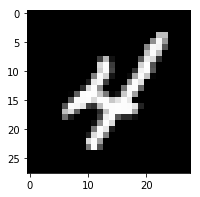

('9th number is', 4)


In [7]:
# displaying the ninth digit

plt.figure(figsize=(3,3))

grid_data = d.iloc[9].as_matrix().reshape(28,28) # reshaping from 1D to 2D
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print("9th number is",l[9])

## Standardize the Data

PCA is effected by scale so we need to scale the features in the data before applying PCA. We can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_images)

# Apply transform to both the training set and the test set.
train_images = scaler.transform(train_images)
test_images = scaler.transform(test_images)

## Importing and Applying PCA

We aim to choose the minimum number of principal components such that 95% of the variance is retained so we create an instance model for 95% variance.

In [9]:
#from sklearn.decomposition import PCA

# Make an instance of the Model
#pca = PCA(.8)

#lower_dimensional_data = pca.fit_transform(train_images)

#pca.n_components_

##pca.fit(train_images) # fitting PCA on training set
##print(pca.n_components_ )

## Scikit-learn method for PCA

In [10]:
from sklearn.decomposition import PCA

pca_sci = PCA(n_components=149)

# use fit_transform
PCs = pca_sci.fit_transform(train_images)

In [11]:
# pca has attribute that gives out the eigen values and its ratio. use dir(pca) to check the list of acceptable attribute

print (pca_sci.explained_variance_ratio_)
print "\n"
print ("Sum :",sum(pca_sci.explained_variance_ratio_))

[0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535092 0.0140172  0.01341743 0.01203742
 0.0111457  0.01089924 0.01028649 0.00994487 0.00936383 0.00921046
 0.00893437 0.00869913 0.00827363 0.00803417 0.00764845 0.00741772
 0.00715293 0.00691846 0.00684135 0.00656673 0.00631676 0.00612917
 0.00596253 0.00587716 0.00571591 0.00562305 0.00554679 0.00538415
 0.00531176 0.00519602 0.00508208 0.00479999 0.0047645  0.00469129
 0.00454333 0.0045134  0.00446949 0.0044337  0.00438207 0.00430364
 0.00426867 0.0042363  0.00404672 0.0039942  0.00397433 0.00393795
 0.00385759 0.00378978 0.00375364 0.00370739 0.00364882 0.00359219
 0.00352326 0.00347741 0.00344322 0.00339786 0.00335875 0.0033476
 0.00331729 0.00322873 0.00316127 0.00313144 0.00310486 0.00307086
 0.00304739 0.00302477 0.00299341 0.00297486 0.00294584 0.00290181
 0.00286225 0.00285275 0.00283161 0.00282365 0.00279314 0.00279012
 0.00278131 0.00276815 0.00275504 0.00273831 0.00270752 0.002687

We can see that 80% of the variance amounts to 149 principal components. The idea with going from 784 components to 149 is to reduce the running time of a supervised learning algorithm (in this case logistic regression)

## Experiment with how well the classification behaves with various ranked approximations

In [12]:
# 60% ==> smaller than estimated
pca2 = PCA(n_components=0.6)
train_img_reduced2 = pca2.fit_transform(train_images)
test_img_reduced2 = pca2.fit_transform(test_images)

X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split( 
    train_img_reduced2, train_labels, test_size=0.2)

In [13]:
print "For 60% train data:",X_train_pca2.shape
print "For 60% test data:",X_test_pca2.shape
print "For 60% train labels:", len(y_train_pca2)
print "For 60% test labels:", len(y_test_pca2)

For 60% train data: (48000, 64)
For 60% test data: (12000, 64)
For 60% train labels: 48000
For 60% test labels: 12000


In [14]:
# 80% ==> estimated
pca3 = PCA(n_components=0.8)
train_img_reduced3 = pca3.fit_transform(train_images)
test_img_reduced3 = pca3.fit_transform(test_images)

X_train_pca3, X_test_pca3, y_train_pca3, y_test_pca3 = train_test_split( 
    train_img_reduced3, train_labels, test_size=0.2)

In [15]:
print "For 80% train data:",X_train_pca3.shape
print "For 80% test data:",X_test_pca3.shape
print "For 80% train labels:", len(y_train_pca3)
print "For 80% test labels:", len(y_test_pca3)

For 80% train data: (48000, 149)
For 80% test data: (12000, 149)
For 80% train labels: 48000
For 80% test labels: 12000


In [16]:
# 100% ==> no reduction
print "d dimensions"                                  
print(d.shape)
print(t_d.shape)

d dimensions
(60000, 784)
(10000, 784)


In [18]:
test_labels = np.array(test_labels)

## Full rank approximation (i.e. no reduction was performed).

In [19]:
def run_model(model, alg_name):
    model.fit(train_images, train_labels)
    # make predictions for test data
    y_pred = model.predict(test_images)
    # calculate the accuracy score
    accuracy =  accuracy_score(test_labels, y_pred) * 100
    return accuracy

In [20]:
# ---- Decision Tree -----------
from sklearn import tree
print("Accuracy of the Classifiers")

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
print("Decision Tree:",run_model(model, "Decision Tree"))

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
print("Random Forest:",run_model(model, "Random Forest"))

# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
print("SVM Classifier",run_model(model, "SVM Classifier"))

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
print("Nearest Neighbor:",run_model(model, "Nearest Neighbors Classifier"))

Accuracy of the Classifiers
('Decision Tree:', 69.95)


/home/campus16/prateekk/.local/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


('Random Forest:', 95.04)
('SVM Classifier', 96.65)
('Nearest Neighbor:', 94.43)


## Smaller than the estimated dimensionality

In [21]:
def run_model1(model, alg_name):
    model.fit(X_train_pca2, y_train_pca2)
    # make predictions for test data
    y_pred = model.predict(X_test_pca2)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test_pca2, y_pred) * 100
    return accuracy

In [49]:
# ---- Decision Tree -----------
from sklearn import tree
print("Accuracy of the Classifiers")

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
print("Decision Tree:",run_model1(model, "Decision Tree"))

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
print("Random Forest:",run_model1(model, "Random Forest"))

# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
print("SVM Classifier",run_model1(model, "SVM Classifier"))

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
print("Nearest Neighbor:",run_model1(model, "Nearest Neighbors Classifier"))

Accuracy of the Classifiers
('Decision Tree:', 65.77499999999999)
('Random Forest:', 91.525)
('SVM Classifier', 91.89166666666667)
('Nearest Neighbor:', 96.0)


## Estimated Dimensionality

In [23]:
def run_model2(model, alg_name):
    model.fit(X_train_pca3, y_train_pca3)
    # make predictions for test data
    y_pred = model.predict(X_test_pca3)
    # calculate the accuracy score
    accuracy =  accuracy_score(y_test_pca3, y_pred) * 100
    return accuracy

In [24]:
# ---- Decision Tree -----------
from sklearn import tree
print("Accuracy of the Classifiers")

model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
print("Decision Tree:",run_model2(model, "Decision Tree"))

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)
print("Random Forest:",run_model2(model, "Random Forest"))

# ------ SVM Classifier ----------------
from sklearn.svm import SVC
model = SVC()
print("SVM Classifier",run_model2(model, "SVM Classifier"))

# -------- Nearest Neighbors ----------
from sklearn import neighbors
model = neighbors.KNeighborsClassifier()
print("Nearest Neighbor:",run_model2(model, "Nearest Neighbors Classifier"))

Accuracy of the Classifiers
('Decision Tree:', 65.74166666666666)
('Random Forest:', 90.45)
('SVM Classifier', 95.19166666666666)
('Nearest Neighbor:', 95.59166666666667)


# Question 2

In [25]:
path_a = "https://raw.githubusercontent.com/ongbw/UN5550-Fall2018/master/projects/data/dataset_a.csv"
path_b = "https://raw.githubusercontent.com/ongbw/UN5550-Fall2018/master/projects/data/dataset_b.csv"

data_a = pd.read_csv(path_a, header = None, error_bad_lines=False) # reading both the csv files
data_b = pd.read_csv(path_b, header = None, error_bad_lines=False)

## Plotting data_a

Text(0.5,1,'Plot for data_a')

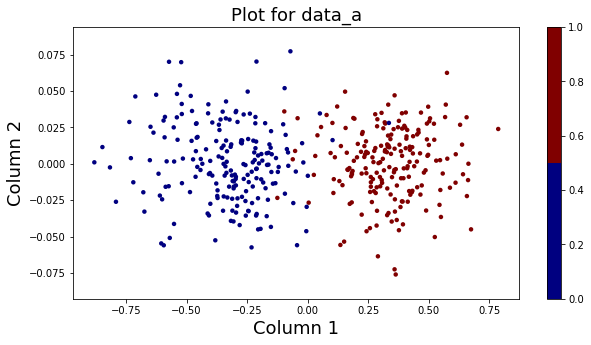

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(data_a[0], data_a[1], c=data_a[2], edgecolor='none', alpha=1,
           cmap=plt.get_cmap('jet', 2), s=20)
plt.colorbar()

plt.xlabel('Column 1', fontsize=18)
plt.ylabel('Column 2', fontsize=18)
plt.title('Plot for data_a', fontsize=18)

## Plotting data_b

Text(0.5,1,'Plot for data_b')

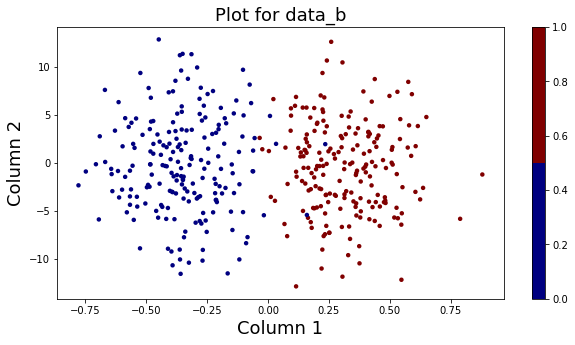

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(data_b[0], data_b[1], c=data_b[2], edgecolor='none', alpha=1,
           cmap=plt.get_cmap('jet', 2), s=20)
plt.colorbar()

plt.xlabel('Column 1', fontsize=18)
plt.ylabel('Column 2', fontsize=18)
plt.title('Plot for data_b', fontsize=18)


# Comparison of LDA and PCA 2D projection of data_a and data_b


Both our datasets represents 2 kinds (0 and 1) with 2 attributes: column 1 and column 2

1. Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. Here we plot the different samples on the 2 first principal components.

2. Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance *between classes*. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.



In [28]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# data_a

In [29]:
X_a = data_a.iloc[:,0:2] #Filtering the data and converting them to array
X_a = np.array(X_a)

y_a = data_a[2]
y_a = np.array(y_a)

target_names = np.array([0,1])

In [30]:
pca = PCA(n_components=2)                         # Performing PCA for 2 components
X_r = pca.fit(X_a).transform(X_a)

lda = LinearDiscriminantAnalysis(n_components=2)  # Performing LDA for 2 components
X_r2 = lda.fit(X_a, y_a).transform(X_a)

In [31]:
# Percentage of variance explained for each components
print (pca.explained_variance_ratio_)

[0.99547207 0.00452793]


Together, the first two principal components contain approx 100% of the information. The first principal component contains 99.5% of the variance and the second principal component contains 0.45% of the variance.

#### Projecting both the PCA and LDA results on a sigle dimension 

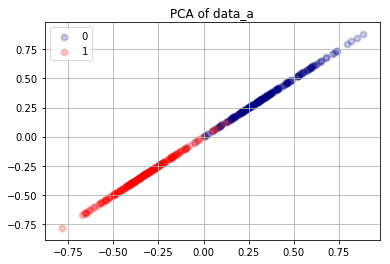

In [32]:
plt.figure()
colors = ['navy', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y_a == i, 0], X_r[y_a == i, 0], color=color, alpha=.2, lw=lw,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of data_a')
plt.grid()

The PCA result of "data_a" shows that there is a bit of overlapping at the centre between both the classes rest the classes are separated on the left and right sides and have high density while approaching towards the centre and at the ends we see separate points.

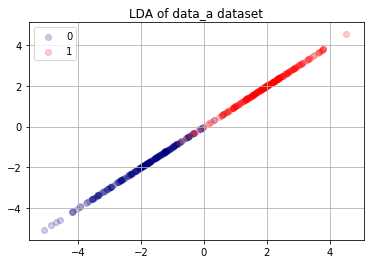

In [33]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[y_a == i, 0], X_r2[y_a == i, 0], alpha=.2, color=color,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of data_a dataset')

plt.grid()
plt.show()

The LDA result of "data_a" is similar to that of PCA but we see that the class positions are now interchanged, class 0 is now in the position of PCA class 1 and vice versa.

In this plot as well we see that there is a bit of overlapping at the centre between both the classes rest the classes are separated on the left and right sides and have high density while approaching towards the centre and at the ends we see separate points.

# data_b

In [34]:
X_b = data_b.iloc[:,0:2] #Filtering the data and converting them to array
X_b = np.array(X_b)


y_b = data_b[2]
y_b = np.array(y_b)

target_names = np.array([0,1])

In [35]:
pca = PCA(n_components=2)                         # Performing PCA for 2 components
X_r = pca.fit(X_b).transform(X_b)

lda = LinearDiscriminantAnalysis(n_components=2)  # Performing LDA for 2 components
X_r2 = lda.fit(X_b, y_b).transform(X_b)

In [36]:
# Percentage of variance explained for each components
print (pca.explained_variance_ratio_)

[0.99413445 0.00586555]


Together, the first two principal components contain approx 100% of the information. The first principal component contains 99.4% of the variance and the second principal component contains 0.58% of the variance.

#### Projecting both the PCA and LDA results on a sigle dimension 

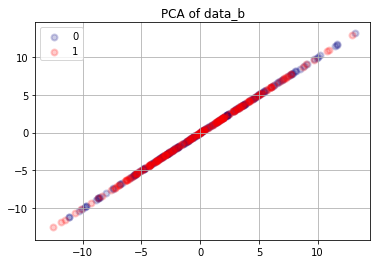

In [37]:
plt.figure()
colors = ['navy', 'red']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y_b == i, 0], X_r[y_b == i, 0], color=color, alpha=.2, lw=lw,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of data_b')
plt.grid()

The PCA result of "data_b" shows that there is a complete overlapping throughout the 1-D plot between both the classes and both of them have a have high density at the centre and at the ends less points.

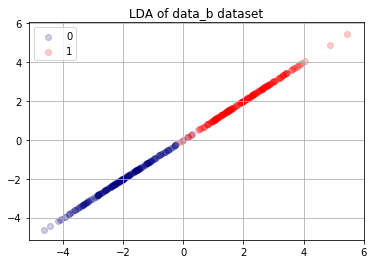

In [38]:
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[y_b == i, 0], X_r2[y_b == i, 0], alpha=.2, color=color,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of data_b dataset')

plt.grid()
plt.show()

The LDA result of "data_b" shows that both the classes are completely separated from each other but there is a very slight overlap at centre and at the centre of both classes we see high density and less density at the ends.

# Question 3

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# set parameters
length_phi = 10   # length of swiss roll in angular direction
length_Z = 15     # length of swiss roll in z direction
sigma = 0.1       # strength of noise
m = 2000          # number of samples

# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
z = length_Z*np.random.rand(m)
x = 1./6*(phi + sigma*xi)*np.sin(phi)
y = 1./6*(phi + sigma*xi)*np.cos(phi)

In [40]:
df = pd.DataFrame(np.column_stack((x,y,z))) # taking the x,y,z parameters and making the dataframe df
df.head()

,0,1,2
0,-0.698753,-1.505019,1.103618
1,0.989736,0.696241,10.323884
2,-0.331114,0.949430,14.485723
3,0.746847,0.909902,10.277533
4,0.276816,-0.000861,8.450515


##### Here inorder to create the adjacency graph I am using the "$\epsilon$"-neighborhood algorithm

In [41]:
from scipy.spatial.distance import pdist,squareform

mat1 = squareform(pdist(df, metric='euclidean')) # calculating based upon the euclidean metric as in algorithm

print "Shape of the Similarity Matrix", mat1.shape

Shape of the Similarity Matrix (2000, 2000)


##### The below dataframe is the distance matrix  where 0 is x, 1 is y and 2 is z 

In [42]:
from scipy.spatial import distance_matrix

df_euclid = pd.DataFrame(1/(1 + distance_matrix(df.T, df.T)))
df_euclid 

,0,1,2
0,1.000000,0.022185,0.002628
1,0.022185,1.000000,0.002567
2,0.002628,0.002567,1.000000


### Computing the Graph-Laplacian 

In [43]:
from scipy.sparse import csgraph
mat1_laplace = csgraph.laplacian(df_euclid, normed=False)

### Finding the eigenvectors of the graph laplacian, and corresponding eigenvalues

In [44]:
from numpy import linalg as LA

eigen_val, eigen_vec = np.linalg.eigh(mat1_laplace)

In [45]:
# constructing a projection matrix
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
# plt.bar(eigen_pairs)
eigen_pairs.sort(reverse = True) # Sorting The Eigen Pairs

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [46]:
PCA_X = pd.DataFrame(df.dot(w))
PCA_X.columns = ['PC 1', 'PC 2']

### Plotting the data in this projected space

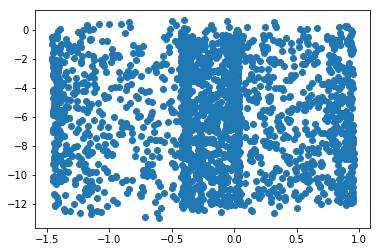

In [47]:
plt.scatter(PCA_X['PC 1'], PCA_X['PC 2'])

### 3d Plot given in the question

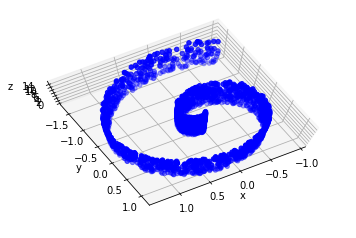

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(80,60) # rotate plot

We can see that the plot which we obtained looks similar to the swiss roll when projected in 2d.